[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/5.1%20%EC%97%85%EC%A2%85%20%ED%85%8C%EB%A7%88%EC%A3%BC%20%EC%88%98%EC%A7%91-input.ipynb)

## 업종/테마 미션

* 팀장님이 우리 회사와 유사한 업종과 테마로 사업을 하고 있는 종목을 수집해서 분석해 달라는 미션을 주셨습니다.
* 코스피에서 해당 업종 혹은 테마의 시가총액이 가장 많은 종목을 찾아주세요.
* 해당 업종/테마의 거래량이 가장 많은 종목을 찾아주세요.
* 최근 52주 최고가에서 현재가 기준으로 가장 손실이 크게 난 종목은 어떤 종목일까요?
* 거래대금이 20위 안에 있는 코스피 종목 중에 "PER"가 가장 낮은 종목은 무엇일까요?


## 업종/테마주 수집

전체 실습을 하고 아래의 URL로 URL만 변경하게 되면 원하는 업종과 테마를 수집할 수 있습니다.

* 2차 전지 : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=64
* 제약 업종 : https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261
* 코로나19(덱사메타손) : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=442
* 제약업체 : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=172
* 바이오시밀러(복제 바이오의약품) : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=241

In [1]:
# 라이브러리 로드 : pandas, matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [3]:
font_family = get_font_family()

In [4]:
# 사용가능한 폰트 스타일
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [5]:
# 그래프 스타일 설정
plt.style.use("seaborn")

# 폰트설정
plt.rc("font", family=get_font_family())

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

<AxesSubplot:title={'center':'한글'}>

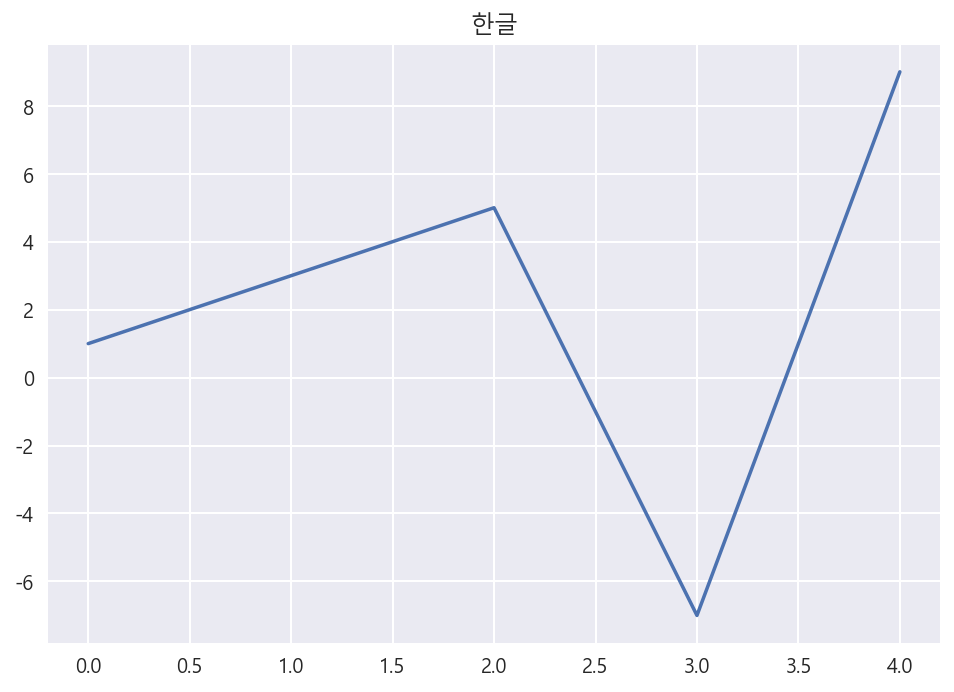

In [6]:
# 한글폰트가 제대로 동작하는지 확인하기
pd.Series([1,3,5,-7,9]).plot(title="한글")

### 제약업종 수집하기
* https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261

In [7]:
# 수집할 업종/테마주소
# url = "https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=35"
# 2차전지
# url = "https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=64"
url = "https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261"
url

'https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261'

In [8]:
# read_html을 통해 해당 업종/테마를 수집합니다.
table = pd.read_html(url, encoding="cp949")
len(table)

3

In [9]:
# 데이터들은 table[2]에 전부 있고
print(table[2].shape)

# dropna를 통해 결측치를 제거합니다.
# how='all' 이면 전부 결측치일시 row나 column을 제거합니다.
raw = table[2].dropna(how='all', axis=0).dropna(how='all',axis=1)

# 3개의 row, 3개의 column이 제거되었습니다.
raw.shape

(149, 12)


(146, 9)

## 파생변수 만들기

In [10]:
# datetime을 이용하여 조회한 날짜를 DataFrame에 기록합니다.
import datetime

today = datetime.datetime.today().strftime("%y-%m-%d")
today

'21-07-30'

In [11]:
# 일자별로 데이터가 다르니 조회일자를 추가해 줍니다.
raw["조회일자"] = today

In [12]:
# 조회일자가 추가되었는지 확인해 봅니다.
raw.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자
1,국전약품 *,9010.0,820.0,+10.01%,8190.0,8200.0,4411311.0,38181.0,37992088.0,21-07-30
2,큐라클 *,39750.0,3100.0,+8.46%,37300.0,37350.0,1758491.0,69681.0,9039645.0,21-07-30
3,대웅제약,173500.0,5500.0,+3.27%,169500.0,170000.0,48820.0,8464.0,140684.0,21-07-30
4,JW중외제약우,41700.0,800.0,+1.96%,41000.0,42000.0,27.0,1.0,312.0,21-07-30
5,카이노스메드 *,3330.0,60.0,+1.83%,3270.0,3300.0,17122.0,57.0,215564.0,21-07-30


## 거래량과 거래대금 시각화

<AxesSubplot:title={'center':'거래량'}, ylabel='종목명'>

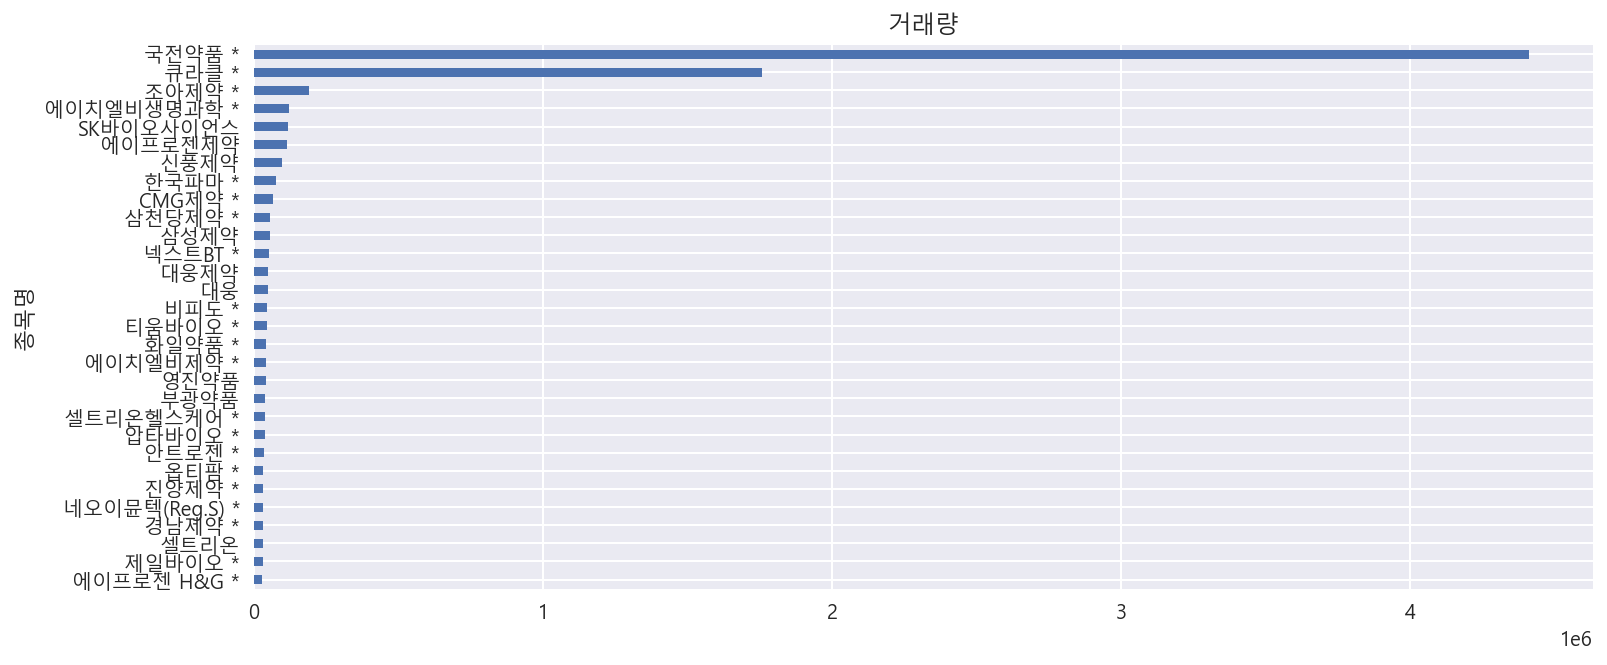

In [13]:
# 종목명 대비 거래량을 bar chart로 그립니다.
# set_index를 해주면 plot시에 y axis label로 그려집니다.
# sort_values시의 기본값이 오름차순이기 때문에 
# DataFrame의 하위 30개를 가져와야 거래량 상위 30개의 종목을 시각화 합니다.
# temp
raw.set_index("종목명")["거래량"].sort_values().tail(30).plot.barh(title="거래량", figsize=(12,5))

<AxesSubplot:title={'center':'거래대금'}, ylabel='종목명'>

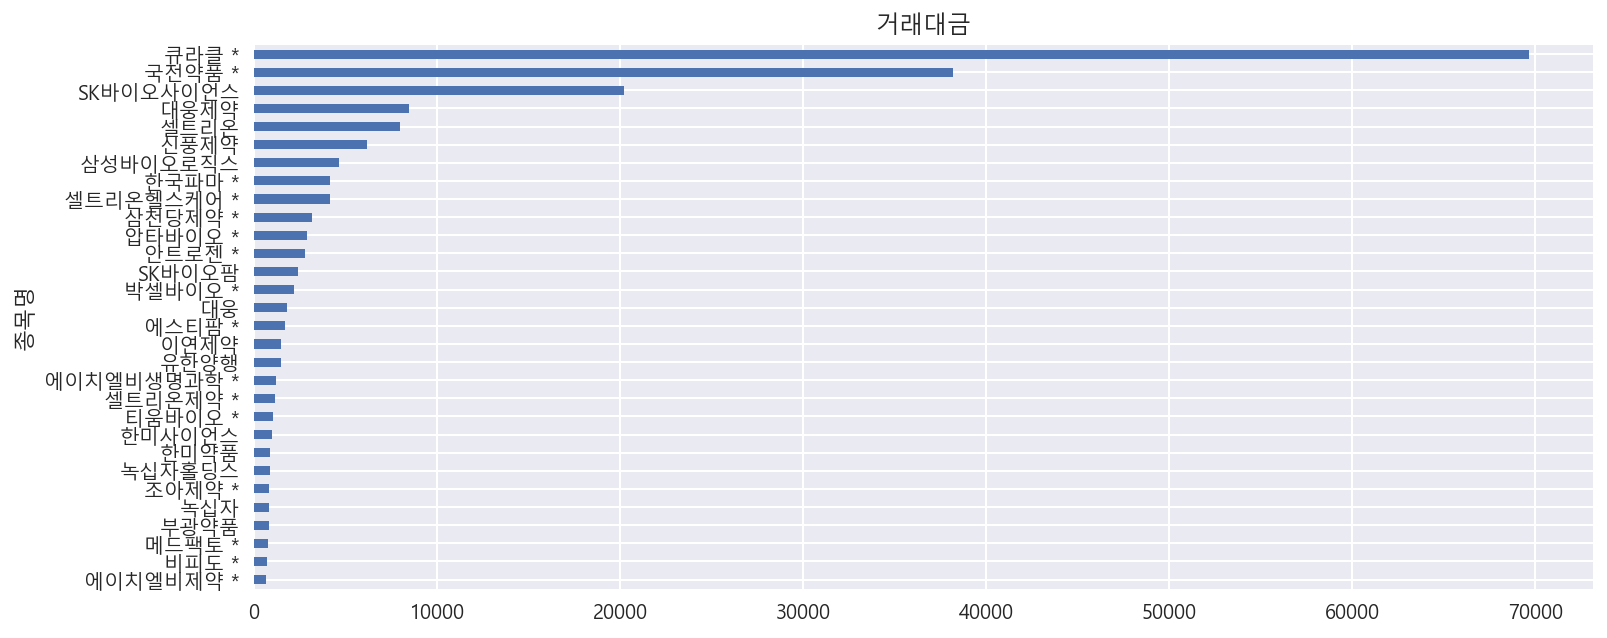

In [14]:
# 위와 동일한 방법으로 종목명 대비 거래대금의 bar chart를 시각화 합니다.
# temp
raw.set_index("종목명")["거래대금"].sort_values().tail(30).plot.barh(title="거래대금", figsize=(12,5))

## 종목코드 병합
* 종목명을 통해 미리 수집해 두었던 krx 전체 상장 종목 목록을 가져오거나 수집해서 데이터를 병합합니다.

In [15]:
# 기존 종목명에는 * 표시가 있기 때문에 * 문자를 제거해서 "종목명_전처리"라는 새로운 컬럼에 담아줍니다.
raw["종목명_전처리"] = raw["종목명"].str.replace("*","", regex=True)
raw["종목명_전처리"] = raw["종목명_전처리"].str.strip() # 공백제거
raw["종목명_전처리"]

1         국전약품
2          큐라클
3         대웅제약
4      JW중외제약우
5       카이노스메드
        ...   
142      신풍제약우
143      압타바이오
144     지트리비앤티
145       한국파마
146        비피도
Name: 종목명_전처리, Length: 146, dtype: object

In [16]:
# raw 변수에 담긴 데이터프레임을 확인합니다.
raw[["종목명", "종목명_전처리"]].head()

,종목명,종목명_전처리
1,국전약품 *,국전약품
2,큐라클 *,큐라클
3,대웅제약,대웅제약
4,JW중외제약우,JW중외제약우
5,카이노스메드 *,카이노스메드


In [17]:
# 저장해 두었던 전체거래소목록(krx.csv) 파일을 불러오거나 
# FinanceDataReader로 StockListing을 다시 받아서 df_krx 라는 변수에 담습니다.
df_krx = pd.read_csv("KRX.csv")
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


### merge 를 통한 종목코드 만들기
* concat과 merge의 차이
    * concat :  
        * axis=0 행을 기준으로 위아래로 같은 컬럼끼리 값을 이어 붙여 새로운 행을 만듦
        * axis=1 컬럼을 기준으로 인덱스가 같은 값을 옆으로 붙여 새로운 컬럼을 만듦
    * merge :
        * index 혹은 특정 컬럼 값을 기준으로 두 개의 데이터프레임을 연결
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_join_axes.png">

In [21]:
# "Symbol", "Name" 만 사용하기 위해 따로 df_item_code_name 변수로 가져옵니다.
# 연결할 key 값으로 사용할 컬럼명을 같게 만들어 주면 전처리가 줄어듭니다.
# Symbol => "종목코드", Name => "종목명_전처리" 로 만들어주면 
# "종목명_전처리" 를 키값으로 합쳤을 때 전처리가 줄어듭니다.
df_item_code_name = df_krx[["Symbol","Name"]]
df_item_code_name.columns = ["종목코드", "종목명_전처리"]
df_item_code_name.head()

,종목코드,종목명_전처리
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


In [22]:
# 종목갯수를 확인하기 위해 df의 행과 열의 수를 출력합니다.
raw.shape

(146, 11)

In [25]:
# 종목코드를 만들어주기 위해 종목명_전처리 컬럼을 기준으로 df_item_code_name 데이터프레임과 병합합니다.
# 양쪽에 "종목명_전처리" 컬럼을 생성해 주었기 때문에 on을 따로지정하지 않아도 알아서 키 값으로 사용합니다.

# raw.merge(df_krx, left_on="종목명_전처리", right_on="Name", how="left")
df = raw.merge(df_item_code_name, on="종목명_전처리", how="left")
df.shape

(146, 12)

In [26]:
# 병합이 잘 되었는지 확인합니다.
df.head(2)

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목명_전처리,종목코드
0,국전약품 *,9010.0,820.0,+10.01%,8190.0,8200.0,4411311.0,38181.0,37992088.0,21-07-30,국전약품,307750
1,큐라클 *,39750.0,3100.0,+8.46%,37300.0,37350.0,1758491.0,69681.0,9039645.0,21-07-30,큐라클,365270


## 종목상세정보 수집

'종목코드', '시가총액', '시가총액순위', '상장주식수', '액면가l매매단위', '외국인한도주식수(A)',
'외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저',
'추정PERlEPS', '동일업종 PER', '동일업종 등락률', '배당수익률'

In [34]:
# 전체 종목을 수집하기 전에 일부 종목을 먼저 수집합니다.
item_code = "068270"
item_name = "셀트리온"

In [36]:
# 종목상세정보를 위한 url을 확보합니다.
# item_code에는 종목코드 수집시에 마지막에 수집된 데이터가 남아있습니다.
item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
print(item_url)

https://finance.naver.com/item/main.nhn?code=068270


In [39]:
# read_html을 이용해 데이터를 수집합니다.
tables = pd.read_html(item_url, encoding="cp949")
len(tables)

13

In [40]:
# 제대로 수집이 되었는지 확인합니다.
tables[0]

,0,1,2
0,"전일 261,500 261,500","고가 262,000262,000 (상한가 339,500339,500 )","거래량 172,743 172,743"
1,"시가 261,500261,500","저가 256,000256,000 (하한가 183,500 )","거래대금 44,680 44,680 백만"


In [43]:
# tables의 원소값을 확인하여 원하는 데이터가 어디에 있는지 확인합니다.
tables[1]

,매도상위,거래량,매수상위,거개량
0,NaN,NaN,NaN,NaN
1,NH투자증권,12224.0,미래에셋대우,18923.0
2,제이피모간,10400.0,키움증권,17657.0
3,삼성,9901.0,삼성,10778.0
4,모건스탠리,9523.0,NH투자증권,10778.0
5,한국증권,8000.0,한국증권,9725.0
6,외국계추정합,19923.0,-12730,7193.0


## 컬럼명과 값 형태로 되어 있는 테이블만 사용

In [44]:
# 수집한 정보를 item_info에 list 형태로 관리합니다.
item_info = []

In [47]:
# 가장 최근의 주요재무정보를 가져와서 item_info 라는 변수에 담습니다.
finance_info = tables[3].iloc[:,[0,-1]]
finance_info.columns = [0,1]
finance_info

,0,1
0,매출액,5199.00
1,영업이익,2263.00
2,당기순이익,1740.00
3,영업이익률,43.53
4,순이익률,33.47
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN
8,유보율,NaN
9,EPS(원),1278.00


In [65]:
# tables을 반복문으로 돌며 컬럼의 수가 2인 테이블만 따로 추출해 
# 위에서 만든 item_info 에 리스트 형태로 추가합니다.
item_info = []
for tb in tables:
    if tb.shape[1] == 2:
        item_info.append(tb)

In [66]:
# 위에서 만든 리스트의 값을 확인합니다.
item_info.append(finance_info)

In [67]:
item_info

[          0               1
 0      시가총액  35조  3,756  억원
 1    시가총액순위         코스피 10위
 2     상장주식수       137916534
 3  액면가l매매단위   1,000원  l  1주,
              0          1
 0  외국인한도주식수(A)  137916534
 1  외국인보유주식수(B)   28097505
 2  외국인소진율(B/A)     20.37%,
            0                    1
 0  투자의견l목표주가   4.00매수  l  373,333
 1   52주최고l최저  396,239  l  229,299,
                    0                  1
 0   PERlEPS(2021.03)  58.84배  l  4,359원
 1          추정PERlEPS  45.00배  l  5,670원
 2  PBRlBPS (2021.03)  9.97배  l  25,720원
 3              배당수익률                NaN,
           0        1
 0  동일업종 PER  104.30배
 1  동일업종 등락률   -1.23%,
             0        1
 0         매출액  5199.00
 1        영업이익  2263.00
 2       당기순이익  1740.00
 3       영업이익률    43.53
 4        순이익률    33.47
 5   ROE(지배주주)      NaN
 6        부채비율      NaN
 7        당좌비율      NaN
 8         유보율      NaN
 9      EPS(원)  1278.00
 10     PER(배)   204.61
 11     BPS(원)      NaN
 12     PBR(배)      NaN
 13   주당배당금(원)      NaN
 14   

## concat을 통해 데이터를 병합

* concat과 merge의 차이
    * concat :  
        * axis=0 행을 기준으로 위아래로 같은 컬럼끼리 값을 이어 붙여 새로운 행을 만듦
        * axis=1 컬럼을 기준으로 인덱스가 같은 값을 옆으로 붙여 새로운 컬럼을 만듦
    * merge :
        * index 혹은 특정 컬럼 값을 기준으로 두 개의 데이터프레임을 연결

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_keys.png">

In [70]:
# item_info[0] 의 컬럼명을 봅니다. 같은 컬럼이 아니면 행끼리 합칠 수 없습니다.
item_info[0]

,0,1
0,시가총액,"35조 3,756 억원"
1,시가총액순위,코스피 10위
2,상장주식수,137916534
3,액면가l매매단위,"1,000원 l 1주"


In [71]:
# concat을 이용하여 item_info를 하나의 DataFrame으로 만듭니다.
df_item = pd.concat(item_info)
df_item

,0,1
0,시가총액,"35조 3,756 억원"
1,시가총액순위,코스피 10위
2,상장주식수,137916534
3,액면가l매매단위,"1,000원 l 1주"
0,외국인한도주식수(A),137916534
1,외국인보유주식수(B),28097505
2,외국인소진율(B/A),20.37%
0,투자의견l목표주가,"4.00매수 l 373,333"
1,52주최고l최저,"396,239 l 229,299"
0,PERlEPS(2021.03),"58.84배 l 4,359원"


## transpose를 통해 행과 열의 위치를 변경

In [73]:
df_item.set_index(0).transpose()

,시가총액,시가총액순위,상장주식수,액면가l매매단위,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2021.03),...,부채비율,당좌비율,유보율,EPS(원),PER(배),BPS(원),PBR(배),주당배당금(원),시가배당률(%),배당성향(%)
1,"35조 3,756 억원",코스피 10위,137916534,"1,000원 l 1주",137916534,28097505,20.37%,"4.00매수 l 373,333","396,239 l 229,299","58.84배 l 4,359원",...,NaN,NaN,NaN,1278.0,204.61,NaN,NaN,NaN,NaN,NaN


In [74]:
# transpose는 .transpose() 혹은  .T 로 사용해 보실 수 있습니다.
df_item_t = df_item.set_index(0).T

## 개별 주가 정보를 수집하는 함수를 생성

In [87]:
# 위에서 한 종목코드에 대해 개별 주가 정보를 얻는 방법을 확인하였으니,
# 같은 방법으로 모든 종목코드의 주가 정보를 추출합니다.
# 무리한 네트워크 요청은 서버에 부담을 줍니다. 
# sleep을 사용해서 서버에 무리한 요청을 하지 않습니다.
'''import numpy as np
import time

def get_item_info(item_code):
    # item_code로 url만들기
    item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
    
    # read_html로 데이터 가져오기
    tables = pd.read_html(item_url, encoding="cp949")
    
    # 필요한 데이터만 찾아서 item_list에 담기
    item_list = []
            
    # 투자정보
    for tb in tables:
        if tb.shape[1] == 2:
            item_list.append(tb)
            
    # 기업실적정보
    finance_info = tables[3].iloc[:,[0,-1]]
    finance_info.columns = [0,1]
    item_list.append(finance_info)
    
    # 컬럼명이 [0,1]로 되어 있는지 확인하고 그렇지 않다면 [0,1]로 만들기
    # pd.concat으로 병합하기
    df_item = pd.concat(item_list)
    
    # set_index로 0번째 컬럼을 인덱스로 만들기    
    # transpose로 행과 열을 바꾸기
    df_item_t = df_item.set_index(0).T
    
    # 서버에 부담을 주지 않기 위해 쉬었다 가져옵니다.
    random_time = np.random.uniform(0.01, 0.3)
    time.sleep(0.01)
    
    # 전처리 결과 반환하기
    return df_item'''

'import numpy as np\nimport time\n\ndef get_item_info(item_code):\n    # item_code로 url만들기\n    item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"\n    \n    # read_html로 데이터 가져오기\n    tables = pd.read_html(item_url, encoding="cp949")\n    \n    # 필요한 데이터만 찾아서 item_list에 담기\n    item_list = []\n            \n    # 투자정보\n    for tb in tables:\n        if tb.shape[1] == 2:\n            item_list.append(tb)\n            \n    # 기업실적정보\n    finance_info = tables[3].iloc[:,[0,-1]]\n    finance_info.columns = [0,1]\n    item_list.append(finance_info)\n    \n    # 컬럼명이 [0,1]로 되어 있는지 확인하고 그렇지 않다면 [0,1]로 만들기\n    # pd.concat으로 병합하기\n    df_item = pd.concat(item_list)\n    \n    # set_index로 0번째 컬럼을 인덱스로 만들기    \n    # transpose로 행과 열을 바꾸기\n    df_item_t = df_item.set_index(0).T\n    \n    # 서버에 부담을 주지 않기 위해 쉬었다 가져옵니다.\n    random_time = np.random.uniform(0.01, 0.3)\n    time.sleep(0.01)\n    \n    # 전처리 결과 반환하기\n    return df_item'

In [94]:
import time
def get_item_info(item_code):
    try:
        # item_code 로 url만들기
        item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
        # read_html 로 데이터 가져오기
        tables = pd.read_html(item_url, encoding="cp949")
        # 필요한 데이터만 찾아서 item_list 에 담기
        item_list = []
        # 투자정보
        for tb in tables:
            if tb.shape[1] == 2:
                item_list.append(tb)
        # 기업실적정보
        finance_info = tables[3].iloc[:, [0, -1]]
        finance_info.columns = [0, 1]
        item_list.append(finance_info)
        # 컬럼명이 [0, 1] 로 되어 있는지 확인하고 그렇지 않다면 [0, 1]로 만들기
        # pd.cocat 으로 병합하기
        df_item = pd.concat(item_list)
        # set_index 로 0번째 컬럼을 인덱스로 만들기
        # T 로 행과 열을 바꾸기
        df_item = df_item.set_index(0).T
        # 서버에 부담을 주지 않기 위해 쉬었다 가져옵니다.
        random_time = np.random.uniform(0.01, 0.3)
        time.sleep(random_time)
        # 전처리 결과 반환하기
        return df_item
    except:
        print(item_code)

In [89]:
# 데이터프레임 형태로 종목정보를 수집해 왔습니다.
# 다른 종목도 아래와 같은 형태로 모아서 concat 으로 연결해 준다면 
# 종목끼리 정보를 비교해 볼 수 있을것 같습니다.
item_code = "178920"
get_item_info(item_code)

,시가총액,시가총액순위,상장주식수,액면가l매매단위,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2021.03),...,부채비율,당좌비율,유보율,EPS(원),PER(배),BPS(원),PBR(배),주당배당금(원),시가배당률(%),배당성향(%)
1,"1조 5,799 억원",코스닥 26위,29366322,500원 l 1주,29366322,5183984,17.65%,"4.00매수 l 70,275","59,400 l 27,550","34.66배 l 1,552원",...,NaN,NaN,NaN,530.0,99.95,NaN,NaN,NaN,NaN,NaN


## tqdm은?
* 오래 걸리는 작업의 진행 상태를 표시합니다.
* https://tqdm.github.io/

In [91]:
# tqdm은 total quality data management의 약자입니다.
# tqdm.auto 에서 tqdm을 불러옵니다.
from tqdm.auto import tqdm
tqdm.pandas()

In [97]:
# 휴럼의 종목코드(353190)가 네이버 데이터가 다르게 되어있습니다.
df_krx[df_krx["Symbol"] == "284420"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
7114,284420,KONEX,휴럼,기타 식품 제조업,"건강기능식품, 유산균 관련 제품",2017-12-12,12월,김진석,http://hurum.co.kr,서울특별시


In [100]:
df.loc[df["종목명_전처리"] == "휴럼", "종목코드"] = "353190"

In [101]:
# DataFrame의 종목코드 column에 있는 종목코드들값을 get_item_info 함수에 적용되어
# result에 series형태로 저장됩니다.
result = df["종목코드"].progress_apply(get_item_info)

  0%|          | 0/146 [00:00<?, ?it/s]

In [96]:
result[0]

0      0       시가총액    시가총액순위     상장주식수     액면가l매매단위 ...
1      0       시가총액    시가총액순위     상장주식수     액면가l매매단위 ...
2      0           시가총액    시가총액순위     상장주식수       액면가...
3      0    시가총액     시가총액순위   상장주식수       액면가l매매단위 외국...
4      0       시가총액    시가총액순위      상장주식수     액면가l매매단위...
                             ...                        
141    0       시가총액    시가총액순위    상장주식수     액면가l매매단위 외...
142    0       시가총액   시가총액순위     상장주식수     액면가l매매단위 외...
143    0       시가총액    시가총액순위     상장주식수     액면가l매매단위 ...
144    0       시가총액    시가총액순위     상장주식수     액면가l매매단위 ...
145    0       시가총액    시가총액순위    상장주식수     액면가l매매단위 외...
Name: 종목코드, Length: 146, dtype: object

## concat 을 통한 데이터 프레임 합치기
* 수집한 종목마다의 정보를 하나의 데이터프레임으로 만듭니다.

In [98]:
df.shape

(146, 12)

In [117]:
# result를 list로 만들고 concat을 통해 DataFrame으로 만듭니다.
# concat으로 데이터프레임을 합쳐줄때는 리스트 형태로 각 데이터프레임을 넣어주어야 합니다.
df_item_info = pd.concat(result.tolist(), ignore_index=True)

In [118]:
# df["종목코드"]를 그대로 넣어주면 종목코드가 다 같은 값이 들어갑니다.
df_item_info["종목코드"] = df["종목코드"].tolist()

In [119]:
# 합쳐줄 해당 종목/테마 데이터프레임을 봅니다.
df_item_info.head()

,시가총액,시가총액순위,상장주식수,액면가l매매단위,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2020.12),...,배당성향(%),PERlEPS(2021.03),PBRlBPS (2021.03),배당수익률l2020.12,PERlEPS(2021.05),PBRlBPS (2021.05),배당수익률l2020.11,PERlEPS(2020.06),PBRlBPS (2020.06),종목코드
0,"4,554 억원",코스닥 208위,49069269,100원 l 1주,49069269,51114,0.10%,N/A l N/A,"12,866 l 2,234",N/A l -80원,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307750
1,"5,095 억원",코스닥 176위,13355968,500원 l 1주,13355968,87019,0.65%,N/A l N/A,"39,600 l 28,500","N/A l -2,624원",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365270
2,"1조 9,813 억원",코스피 151위,11586575,"2,500원 l 1주",11586575,610972,5.27%,"3.86매수 l 201,429","286,500 l 88,200",NaN,...,NaN,N/A l -952원,"3.44배 l 49,699원",0.35%,NaN,NaN,NaN,NaN,NaN,069620
3,73 억원,코스피 1490위,177486,"2,500원 l 1주",177486,532,0.30%,N/A l N/A,"117,088 l 28,200",NaN,...,NaN,N/A l -370원,"4.54배 l 9,038원",0.85%,NaN,NaN,NaN,NaN,NaN,001065
4,"3,462 억원",코스닥 302위,105242808,100원 l 1주,105242808,4202495,3.99%,N/A l N/A,"6,730 l 3,210",NaN,...,NaN,N/A l -128원,34.63배 l 95원,NaN,NaN,NaN,NaN,NaN,NaN,284620


## merge 를 통한 데이터프레임 합치기
* 업종/테마 목록과 개별 종목 정보를 수집한 데이터프레임을 합쳐줍니다.

In [124]:
df

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목명_전처리,종목코드
0,국전약품 *,9010.0,820.0,+10.01%,8190.0,8200.0,4411311.0,38181.0,37992088.0,21-07-30,국전약품,307750
1,큐라클 *,39750.0,3100.0,+8.46%,37300.0,37350.0,1758491.0,69681.0,9039645.0,21-07-30,큐라클,365270
2,대웅제약,173500.0,5500.0,+3.27%,169500.0,170000.0,48820.0,8464.0,140684.0,21-07-30,대웅제약,069620
3,JW중외제약우,41700.0,800.0,+1.96%,41000.0,42000.0,27.0,1.0,312.0,21-07-30,JW중외제약우,001065
4,카이노스메드 *,3330.0,60.0,+1.83%,3270.0,3300.0,17122.0,57.0,215564.0,21-07-30,카이노스메드,284620
...,...,...,...,...,...,...,...,...,...,...,...,...
141,신풍제약우,86400.0,1400.0,-1.59%,90000.0,90200.0,2587.0,224.0,26894.0,21-07-30,신풍제약우,019175
142,압타바이오 *,77700.0,1300.0,-1.65%,78900.0,79000.0,37249.0,2904.0,671245.0,21-07-30,압타바이오,293780
143,지트리비앤티 *,10200.0,200.0,-1.92%,10400.0,10450.0,17267.0,178.0,261771.0,21-07-30,지트리비앤티,115450
144,한국파마 *,54800.0,1200.0,-2.14%,55400.0,55500.0,76816.0,4170.0,1143637.0,21-07-30,한국파마,032300


In [125]:
# DateFrame df와 df_item_info를 공통되는 column을 통해 합칩니다.
# "종목코드" 컬럼이 두 데이터프레임에 있기 때문에 "종목코드" 컬럼을 기준으로 merge됩니다.
df_info = df.merge(df_item_info, how = "left")
df_info.shape

(146, 51)

In [126]:
# shape의 column수를 통해 데이터(종목코드)가 합쳐 졌음을 알 수 있습니다.
# df, df_item_info, df_info 확인하기
df.shape, df_item_info.shape, df_info.shape

((146, 12), (146, 40), (146, 51))

In [128]:
# 일부 데이터만 가져와서 확인합니다.
df_info.head(2)

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,...,시가배당률(%),배당성향(%),PERlEPS(2021.03),PBRlBPS (2021.03),배당수익률l2020.12,PERlEPS(2021.05),PBRlBPS (2021.05),배당수익률l2020.11,PERlEPS(2020.06),PBRlBPS (2020.06)
0,국전약품 *,9010.0,820.0,+10.01%,8190.0,8200.0,4411311.0,38181.0,37992088.0,21-07-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,큐라클 *,39750.0,3100.0,+8.46%,37300.0,37350.0,1758491.0,69681.0,9039645.0,21-07-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 파일명 만들기

In [139]:
# 파일 이름을 url의 정보를 이용하여 만듭니다.
# 업종_no_번호_날짜.csv, 혹은 테마_no_번호.csv 형태로 만듭니다.

import datetime

name_1 = url.split("=")[1].replace("&","_")
name_2 = url.split("=")[2]

datetime.datetime.today().strftime("%y_%m_%d")

file_name = f"{name_1}_{name_2}_{today}.csv"
file_name

'upjong_no_261_21-07-30.csv'

In [142]:
# csv 파일로 저장합니다.
df_info.to_csv(file_name, index=False)

In [143]:
# 제대로 저장되었는지 확인합니다.
pd.read_csv(file_name)

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,...,시가배당률(%),배당성향(%),PERlEPS(2021.03),PBRlBPS (2021.03),배당수익률l2020.12,PERlEPS(2021.05),PBRlBPS (2021.05),배당수익률l2020.11,PERlEPS(2020.06),PBRlBPS (2020.06)
0,국전약품 *,9010.0,820.0,+10.01%,8190.0,8200.0,4411311.0,38181.0,37992088.0,21-07-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,큐라클 *,39750.0,3100.0,+8.46%,37300.0,37350.0,1758491.0,69681.0,9039645.0,21-07-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,대웅제약,173500.0,5500.0,+3.27%,169500.0,170000.0,48820.0,8464.0,140684.0,21-07-30,...,NaN,NaN,N/A l -952원,"3.44배 l 49,699원",0.35%,NaN,NaN,NaN,NaN,NaN
3,JW중외제약우,41700.0,800.0,+1.96%,41000.0,42000.0,27.0,1.0,312.0,21-07-30,...,NaN,NaN,N/A l -370원,"4.54배 l 9,038원",0.85%,NaN,NaN,NaN,NaN,NaN
4,카이노스메드 *,3330.0,60.0,+1.83%,3270.0,3300.0,17122.0,57.0,215564.0,21-07-30,...,NaN,NaN,N/A l -128원,34.63배 l 95원,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,신풍제약우,86400.0,1400.0,-1.59%,90000.0,90200.0,2587.0,224.0,26894.0,21-07-30,...,NaN,NaN,996.51배 l 86원,"12.02배 l 7,132원",0.13%,NaN,NaN,NaN,NaN,NaN
142,압타바이오 *,77700.0,1300.0,-1.65%,78900.0,79000.0,37249.0,2904.0,671245.0,21-07-30,...,NaN,NaN,N/A l -554원,"12.09배 l 6,213원",NaN,NaN,NaN,NaN,NaN,NaN
143,지트리비앤티 *,10200.0,200.0,-1.92%,10400.0,10450.0,17267.0,178.0,261771.0,21-07-30,...,NaN,NaN,N/A l -712원,"3.13배 l 3,245원",NaN,NaN,NaN,NaN,NaN,NaN
144,한국파마 *,54800.0,1200.0,-2.14%,55400.0,55500.0,76816.0,4170.0,1143637.0,21-07-30,...,NaN,NaN,NaN,NaN,0.09%,NaN,NaN,NaN,NaN,NaN
